<a href="https://colab.research.google.com/github/NQT2906/CS114.K21/blob/GG_Vision_API/GG_Vision_API_CS114_K21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import getpass

YOUR_API_KEY = getpass.getpass('Enter your API_KEY')

!curl -v -s -H "Content-Type: application/json" \
    https://vision.googleapis.com/v1/images:annotate?key=$YOUR_API_KEY \
    --data-binary @request.json

Enter your API_KEY··········
*   Trying 74.125.195.95...
* TCP_NODELAY set
* Connected to vision.googleapis.com (74.125.195.95) port 443 (#0)
* ALPN, offering h2
* ALPN, offering http/1.1
* successfully set certificate verify locations:
*   CAfile: /etc/ssl/certs/ca-certificates.crt
  CApath: /etc/ssl/certs
* TLSv1.3 (OUT), TLS handshake, Client hello (1):
* TLSv1.3 (IN), TLS handshake, Server hello (2):
* TLSv1.3 (IN), TLS Unknown, Certificate Status (22):
* TLSv1.3 (IN), TLS handshake, Unknown (8):
* TLSv1.3 (IN), TLS handshake, Certificate (11):
* TLSv1.3 (IN), TLS handshake, CERT verify (15):
* TLSv1.3 (IN), TLS handshake, Finished (20):
* TLSv1.3 (OUT), TLS change cipher, Client hello (1):
* TLSv1.3 (OUT), TLS Unknown, Certificate Status (22):
* TLSv1.3 (OUT), TLS handshake, Finished (20):
* SSL connection using TLSv1.3 / TLS_AES_256_GCM_SHA384
* ALPN, server accepted to use h2
* Server certificate:
*  subject: C=US; ST=California; L=Mountain View; O=Google LLC; CN=upload.video.go

In [0]:
import os

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = os.path.join(os.curdir, 'CS114-CloudVisionAPI-18521470-4842515e74a9.json') 

!echo $GOOGLE_APPLICATION_CREDENTIALS

!cat $GOOGLE_APPLICATION_CREDENTIALS

./CS114-CloudVisionAPI-18521470-4842515e74a9.json
cat: ./CS114-CloudVisionAPI-18521470-4842515e74a9.json: No such file or directory


In [0]:
!pip install --upgrade google-cloud-vision

     |████████████████████████████████| 440kB 5.0MB/s 


In [0]:
from google.colab.patches import cv2_imshow
import cv2
import os

def download_view(img_url):
  img_file = os.path.basename(img_url)
  !curl -o $img_file $img_url
  img = cv2.imread(img_file, cv2.IMREAD_UNCHANGED)
  cv2_imshow(img)
  return img_file

https://i.imgur.com/1lifZpQ.jpg
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  543k  100  543k    0     0  1655k      0 --:--:-- --:--:-- --:--:-- 1650k


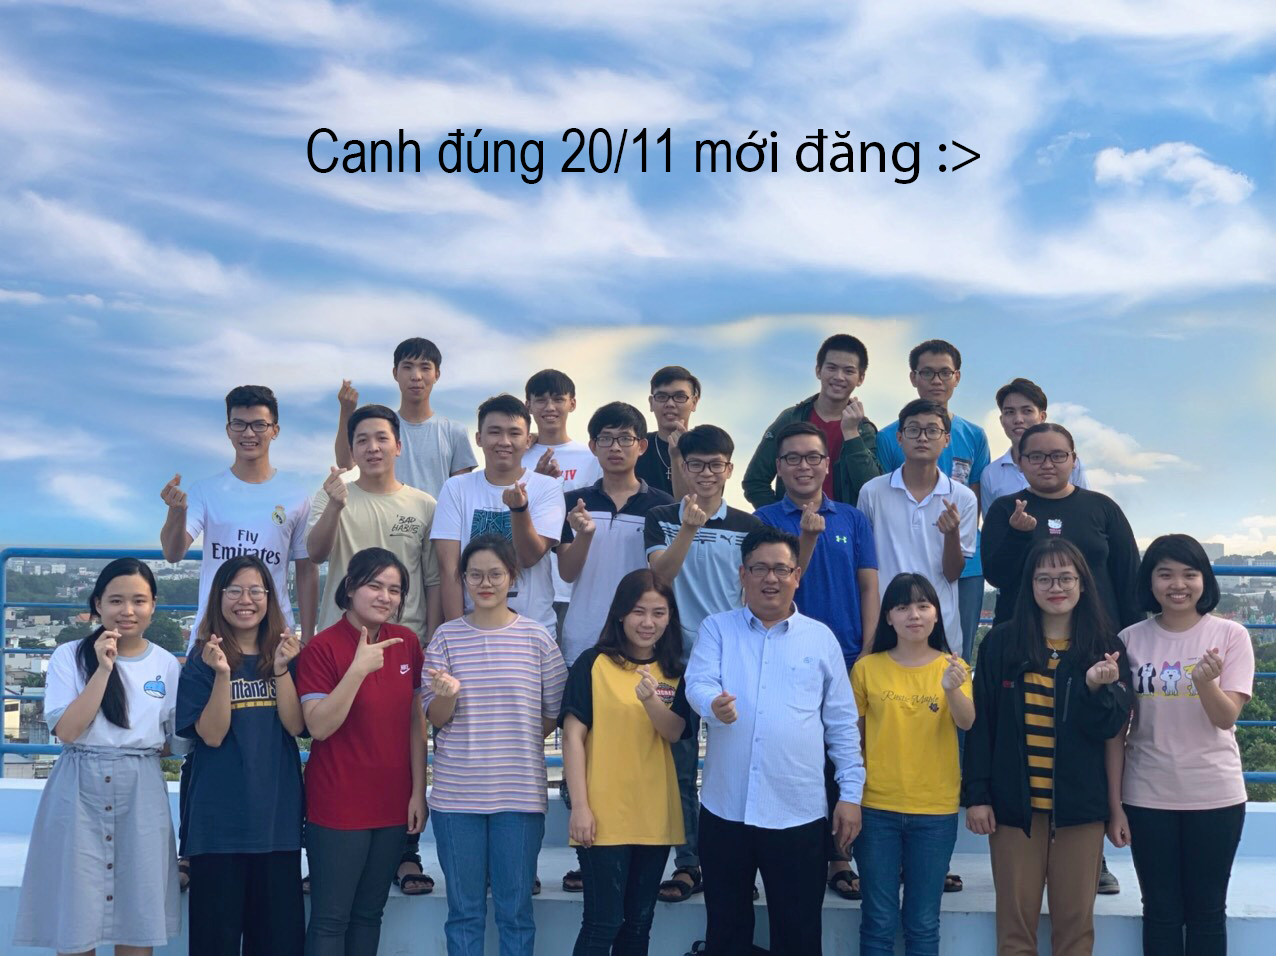

1lifZpQ.jpg


In [0]:
#@title Nhập URL

img_url = "https://i.imgur.com/1lifZpQ.jpg" #@param {type:"string"}

print(img_url)
img_file = download_view(img_url)
print(img_file)

In [0]:
# https://cloud.google.com/vision/docs/face-tutorial

def detect_face(face_file, max_results=20):
    """Uses the Vision API to detect faces in the given file.

    Args:
        face_file: A file-like object containing an image with faces.

    Returns:
        An array of Face objects with information about the picture.
    """
    client = vision.ImageAnnotatorClient()

    content = face_file.read()
    image = types.Image(content=content)

    return client.face_detection(
        image=image, max_results=max_results).face_annotations

In [0]:
# https://cloud.google.com/vision/docs/face-tutorial

def highlight_faces(image, faces, output_filename):
    """Draws a polygon around the faces, then saves to output_filename.

    Args:
      image: a file containing the image with the faces.
      faces: a list of faces found in the file. This should be in the format
          returned by the Vision API.
      output_filename: the name of the image file to be created, where the
          faces have polygons drawn around them.
    """
    im = Image.open(image)
    draw = ImageDraw.Draw(im)
    # Sepecify the font-family and the font-size
    for face in faces:
        box = [(vertex.x, vertex.y)
               for vertex in face.bounding_poly.vertices]
        draw.line(box + [box[0]], width=5, fill='#00ff00')
        # Place the confidence value/score of the detected faces above the
        # detection box in the output image
        draw.text(((face.bounding_poly.vertices)[0].x,
                   (face.bounding_poly.vertices)[0].y - 30),
                  str(format(face.detection_confidence, '.3f')) + '%',
                  fill='#FF0000')
    im.save(output_filename)

In [0]:
from google.cloud import vision
from google.cloud.vision import types
from PIL import Image, ImageDraw
from google.colab.patches import cv2_imshow
import cv2

output_filename = img_file + '.facedet.jpg'
max_results = 30

with open(img_file, 'rb') as image:
    faces = detect_face(image, max_results)
    print('Found {} face{}'.format(
        len(faces), '' if len(faces) == 1 else 's'))

    print('Writing to file {}'.format(output_filename))
    # Reset the file pointer, so we can read the file again
    image.seek(0)
    highlight_faces(image, faces, output_filename)
    img = cv2.imread(output_filename, cv2.IMREAD_UNCHANGED)
    cv2_imshow(img)

DefaultCredentialsError: ignored

In [0]:
# https://cloud.google.com/vision/docs/detecting-faces

from google.cloud import vision

def detect_faces_uri(uri):
    """Detects faces in the file located in Google Cloud Storage or the web."""
    client = vision.ImageAnnotatorClient()
    image = vision.types.Image()
    image.source.image_uri = uri

    response = client.face_detection(image=image)
    faces = response.face_annotations

    # Names of likelihood from google.cloud.vision.enums
    likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                       'LIKELY', 'VERY_LIKELY')
    print('Faces:')

    for face in faces:
        print('anger: {}'.format(likelihood_name[face.anger_likelihood]))
        print('joy: {}'.format(likelihood_name[face.joy_likelihood]))
        print('surprise: {}'.format(likelihood_name[face.surprise_likelihood]))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in face.bounding_poly.vertices])

        print('face bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
     

In [0]:
detect_faces_uri(img_url)